In [1]:
import pandas as pd


df = pd.read_csv("knn_imputed_data.csv")
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("id", axis=1)
df = df.drop("time", axis=1)
mood_mean = 6.994508952080043
mood_std = 0.719659211765692

# Recalculate the moods back using the mean and STD
df["mood"] = (df["mood"]*mood_std)+mood_mean
df["mood"] = df["mood"].round()

y = df['mood']
X = df.drop('mood', axis=1)
X

,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,screen,sms,circumplex.arousal,circumplex.valence
0,0.243295,0.447549,0.434987,0.119466,0.039790,0.0,0.035532,0.065960,0.176723,0.326282,0.000000,0.272236,0.000000,0.193548,0.856057,0.000000,0.550000,0.420290
1,0.328776,0.117903,0.343701,0.011066,0.016927,0.0,0.000000,0.027001,0.017233,0.014135,0.000000,0.065417,0.000000,0.096774,0.316896,0.058824,0.650000,0.516908
2,0.185734,0.175857,0.338892,0.011188,0.034858,0.0,0.000000,0.020035,0.035311,0.000000,0.000000,0.016733,0.092875,0.000000,0.349480,0.000000,0.550000,0.613527
3,0.164390,0.169103,0.580359,0.115851,0.027391,0.0,0.000632,0.018311,0.126365,0.155037,0.000000,0.095643,0.000000,0.322581,0.776345,0.000000,0.600000,0.355878
4,0.204806,0.168532,0.618168,0.008088,0.034578,0.0,0.000000,0.049196,0.075239,0.000000,0.088728,0.123966,0.000000,0.000000,0.848311,0.058824,0.625000,0.516908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,0.026449,0.108410,0.143937,0.014786,0.000000,0.0,0.000000,0.039256,0.078828,0.000000,0.000000,0.031242,0.000000,0.032258,0.211007,0.117647,0.350000,0.484702
1298,0.215064,0.450578,0.134137,0.072893,0.000000,0.0,0.073920,0.142791,0.201431,0.000000,0.000000,0.017056,0.000000,0.322581,0.656190,0.058824,0.500000,0.742351
1299,0.352581,0.078020,0.030133,0.016215,0.000000,0.0,0.000000,0.008034,0.070161,0.000356,0.000000,0.001779,0.000000,0.161290,0.177519,0.058824,0.166667,0.677939
1300,0.350574,0.500611,0.115712,0.030857,0.000000,0.0,0.000000,0.014474,0.124116,0.398864,0.003259,0.118875,0.000000,0.129032,0.490007,0.000000,0.300000,0.227053


## Recurrent Neural Network

For this first classification we will train a neural network in order to predict the mood for the next day.

In order to do classification, we need a training set and a testing set. We will use 80% of the data for training purposes and 20% for testing purposes.


In [42]:
from keras import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical

X_reshaped = X.values.reshape(-1, 1, X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# to categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
from keras import backend as K

model = Sequential()
model.add(LSTM(64, input_shape=(1, X.shape[1])))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))

model.compile(
    loss = "categorical_crossentropy", 
    optimizer="adam", 
    metrics=['accuracy', 'mae', 'mse', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

2023-04-22 02:45:46.794546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-22 02:45:46.799466: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-22 02:45:46.801051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Train the model over 10 runs of 300 epochs in order to analyze the accuracy of the model according to the validation data.

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score

histories = []
analytics = []
for epoch in range(200, 225, 25):
    history = model.fit(X_train, y_train, epochs=epoch, batch_size=32, validation_split=0.2)
    histories.append(history)

    # Evaluate model
    analytic = model.evaluate(X_test, y_test)
    analytics.append((epoch, analytic))


Epoch 1/200
26/26 [==============================] - 0s 7ms/step - loss: 0.2660 - accuracy: 0.8906 - mae: 0.0822 - mse: 0.0703 - precision_3: 0.5603 - recall_3: 1.0000 - val_loss: 0.9002 - val_accuracy: 0.7656 - val_mae: 0.0934 - val_mse: 0.0819 - val_precision_3: 0.5425 - val_recall_3: 0.9474
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2602 - accuracy: 0.8870 - mae: 0.0820 - mse: 0.0699 - precision_3: 0.5618 - recall_3: 1.0000 - val_loss: 0.9311 - val_accuracy: 0.7177 - val_mae: 0.0947 - val_mse: 0.0835 - val_precision_3: 0.5393 - val_recall_3: 0.9522
Epoch 3/200
26/26 [==============================] - 0s 6ms/step - loss: 0.2662 - accuracy: 0.8882 - mae: 0.0822 - mse: 0.0705 - precision_3: 0.5629 - recall_3: 1.0000 - val_loss: 0.9183 - val_accuracy: 0.7416 - val_mae: 0.0943 - val_mse: 0.0830 - val_precision_3: 0.5408 - val_recall_3: 0.9522
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2581 - accuracy: 0.8846 - mae: 0.0823 - 

Epoch 29/200
26/26 [==============================] - 0s 6ms/step - loss: 0.2586 - accuracy: 0.8906 - mae: 0.0821 - mse: 0.0704 - precision_3: 0.5610 - recall_3: 1.0000 - val_loss: 0.9164 - val_accuracy: 0.7512 - val_mae: 0.0936 - val_mse: 0.0822 - val_precision_3: 0.5440 - val_recall_3: 0.9474
Epoch 30/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2552 - accuracy: 0.8954 - mae: 0.0817 - mse: 0.0698 - precision_3: 0.5633 - recall_3: 1.0000 - val_loss: 0.9258 - val_accuracy: 0.7464 - val_mae: 0.0922 - val_mse: 0.0803 - val_precision_3: 0.5395 - val_recall_3: 0.9474
Epoch 31/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2616 - accuracy: 0.8918 - mae: 0.0817 - mse: 0.0698 - precision_3: 0.5625 - recall_3: 1.0000 - val_loss: 0.9222 - val_accuracy: 0.7512 - val_mae: 0.0939 - val_mse: 0.0825 - val_precision_3: 0.5422 - val_recall_3: 0.9522
Epoch 32/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2562 - accuracy: 0.8978 - mae: 0.081

Epoch 57/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2527 - accuracy: 0.8942 - mae: 0.0816 - mse: 0.0696 - precision_3: 0.5637 - recall_3: 1.0000 - val_loss: 0.9299 - val_accuracy: 0.7464 - val_mae: 0.0934 - val_mse: 0.0820 - val_precision_3: 0.5437 - val_recall_3: 0.9522
Epoch 58/200
26/26 [==============================] - 0s 7ms/step - loss: 0.2537 - accuracy: 0.8954 - mae: 0.0816 - mse: 0.0697 - precision_3: 0.5637 - recall_3: 1.0000 - val_loss: 0.9243 - val_accuracy: 0.7560 - val_mae: 0.0929 - val_mse: 0.0813 - val_precision_3: 0.5410 - val_recall_3: 0.9474
Epoch 59/200
26/26 [==============================] - 0s 6ms/step - loss: 0.2534 - accuracy: 0.8942 - mae: 0.0812 - mse: 0.0691 - precision_3: 0.5652 - recall_3: 1.0000 - val_loss: 0.9231 - val_accuracy: 0.7512 - val_mae: 0.0934 - val_mse: 0.0819 - val_precision_3: 0.5437 - val_recall_3: 0.9522
Epoch 60/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2752 - accuracy: 0.8762 - mae: 0.081

Epoch 85/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2521 - accuracy: 0.8930 - mae: 0.0811 - mse: 0.0691 - precision_3: 0.5656 - recall_3: 1.0000 - val_loss: 0.9387 - val_accuracy: 0.7512 - val_mae: 0.0932 - val_mse: 0.0816 - val_precision_3: 0.5440 - val_recall_3: 0.9474
Epoch 86/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2501 - accuracy: 0.8966 - mae: 0.0812 - mse: 0.0693 - precision_3: 0.5664 - recall_3: 1.0000 - val_loss: 0.9427 - val_accuracy: 0.7464 - val_mae: 0.0935 - val_mse: 0.0822 - val_precision_3: 0.5452 - val_recall_3: 0.9522
Epoch 87/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2539 - accuracy: 0.8942 - mae: 0.0814 - mse: 0.0694 - precision_3: 0.5645 - recall_3: 1.0000 - val_loss: 0.9460 - val_accuracy: 0.7512 - val_mae: 0.0928 - val_mse: 0.0811 - val_precision_3: 0.5422 - val_recall_3: 0.9522
Epoch 88/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2501 - accuracy: 0.8966 - mae: 0.081

Epoch 113/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2621 - accuracy: 0.8870 - mae: 0.0808 - mse: 0.0686 - precision_3: 0.5668 - recall_3: 1.0000 - val_loss: 0.9640 - val_accuracy: 0.7273 - val_mae: 0.0917 - val_mse: 0.0796 - val_precision_3: 0.5455 - val_recall_3: 0.9474
Epoch 114/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2508 - accuracy: 0.8894 - mae: 0.0805 - mse: 0.0683 - precision_3: 0.5699 - recall_3: 1.0000 - val_loss: 0.9439 - val_accuracy: 0.7512 - val_mae: 0.0933 - val_mse: 0.0819 - val_precision_3: 0.5452 - val_recall_3: 0.9522
Epoch 115/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2521 - accuracy: 0.8942 - mae: 0.0810 - mse: 0.0690 - precision_3: 0.5675 - recall_3: 1.0000 - val_loss: 0.9494 - val_accuracy: 0.7416 - val_mae: 0.0920 - val_mse: 0.0802 - val_precision_3: 0.5437 - val_recall_3: 0.9522
Epoch 116/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2514 - accuracy: 0.8918 - mae: 0

Epoch 141/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.8906 - mae: 0.0804 - mse: 0.0684 - precision_3: 0.5699 - recall_3: 1.0000 - val_loss: 0.9550 - val_accuracy: 0.7416 - val_mae: 0.0917 - val_mse: 0.0798 - val_precision_3: 0.5482 - val_recall_3: 0.9522
Epoch 142/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2467 - accuracy: 0.8990 - mae: 0.0805 - mse: 0.0685 - precision_3: 0.5664 - recall_3: 1.0000 - val_loss: 0.9680 - val_accuracy: 0.7321 - val_mae: 0.0918 - val_mse: 0.0799 - val_precision_3: 0.5452 - val_recall_3: 0.9522
Epoch 143/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.8918 - mae: 0.0805 - mse: 0.0685 - precision_3: 0.5683 - recall_3: 1.0000 - val_loss: 0.9668 - val_accuracy: 0.7464 - val_mae: 0.0923 - val_mse: 0.0806 - val_precision_3: 0.5467 - val_recall_3: 0.9522
Epoch 144/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2489 - accuracy: 0.8978 - mae: 0

Epoch 169/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2443 - accuracy: 0.8966 - mae: 0.0804 - mse: 0.0683 - precision_3: 0.5660 - recall_3: 1.0000 - val_loss: 0.9696 - val_accuracy: 0.7416 - val_mae: 0.0928 - val_mse: 0.0813 - val_precision_3: 0.5467 - val_recall_3: 0.9522
Epoch 170/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2433 - accuracy: 0.8966 - mae: 0.0802 - mse: 0.0682 - precision_3: 0.5695 - recall_3: 1.0000 - val_loss: 0.9717 - val_accuracy: 0.7512 - val_mae: 0.0920 - val_mse: 0.0802 - val_precision_3: 0.5467 - val_recall_3: 0.9522
Epoch 171/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2434 - accuracy: 0.8978 - mae: 0.0802 - mse: 0.0682 - precision_3: 0.5683 - recall_3: 1.0000 - val_loss: 0.9670 - val_accuracy: 0.7416 - val_mae: 0.0928 - val_mse: 0.0813 - val_precision_3: 0.5467 - val_recall_3: 0.9522
Epoch 172/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 0.8918 - mae: 0

Epoch 197/200
26/26 [==============================] - 0s 4ms/step - loss: 0.2442 - accuracy: 0.8966 - mae: 0.0798 - mse: 0.0678 - precision_3: 0.5710 - recall_3: 1.0000 - val_loss: 0.9726 - val_accuracy: 0.7512 - val_mae: 0.0922 - val_mse: 0.0806 - val_precision_3: 0.5482 - val_recall_3: 0.9522
Epoch 198/200
26/26 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.8966 - mae: 0.0802 - mse: 0.0683 - precision_3: 0.5679 - recall_3: 1.0000 - val_loss: 1.0001 - val_accuracy: 0.7368 - val_mae: 0.0914 - val_mse: 0.0794 - val_precision_3: 0.5482 - val_recall_3: 0.9522
Epoch 199/200
26/26 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.8882 - mae: 0.0798 - mse: 0.0676 - precision_3: 0.5695 - recall_3: 1.0000 - val_loss: 0.9835 - val_accuracy: 0.7464 - val_mae: 0.0927 - val_mse: 0.0812 - val_precision_3: 0.5467 - val_recall_3: 0.9522
Epoch 200/200
9/9 [==============================] - 0s 2ms/step - loss: 1.3315 - accuracy: 0.6743 - mae: 0.0

In [60]:
analytics

[(200,
  [1.3315472602844238,
   0.6743295192718506,
   0.09374081343412399,
   0.08080026507377625,
   0.5426008701324463,
   0.9272030591964722])]

In [47]:
# Average out multiple runs
import numpy as np

# Accuracies
train_accuracies = np.mean([hist.history["accuracy"] for hist in histories], axis=0)
val_accuracies = np.mean([hist.history["val_accuracy"] for hist in histories], axis=0)

# recall
train_recall = np.mean([hist.history["recall_3"] for hist in histories], axis=0)
val_recall = np.mean([hist.history["val_recall_3"] for hist in histories], axis=0)

# precision
train_precision = np.mean([hist.history["precision_3"] for hist in histories], axis=0)
val_precision = np.mean([hist.history["val_precision_3"] for hist in histories], axis=0)

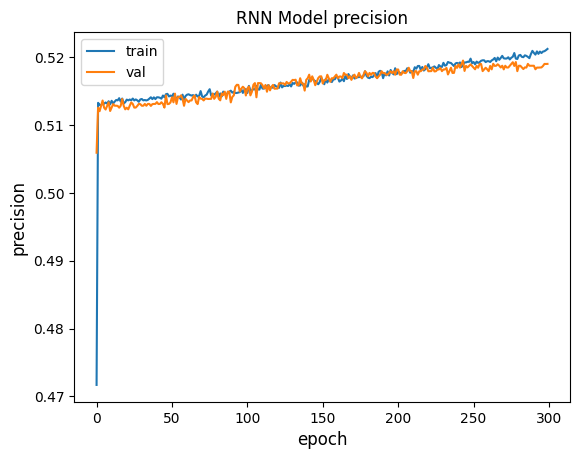

In [53]:
import matplotlib.pyplot as plt

metric = "precision"
plt.figure()
plt.plot(train_precision)
plt.plot(val_precision)
plt.title("RNN Model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.savefig("RNN_Model_"+ metric + "_" +str(300))
plt.show()
plt.close()

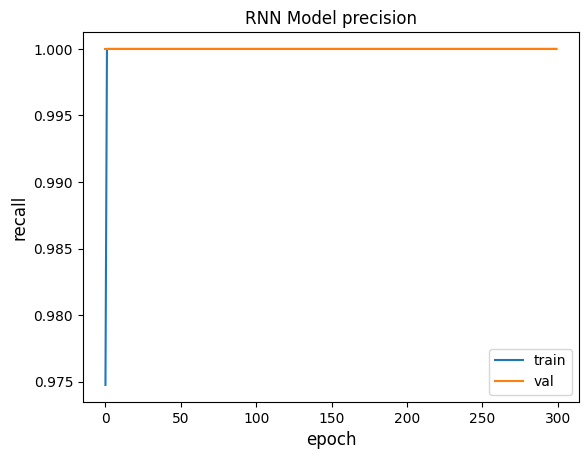

In [9]:
metric = "recall"
plt.figure()
plt.plot(histories[0].history[metric])
plt.plot(histories[0].history["val_" + metric])
plt.title("RNN Model precision")
plt.ylabel("recall", fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.savefig("RNN_Model_"+ metric + "_" +str(300))
plt.show()
plt.close()

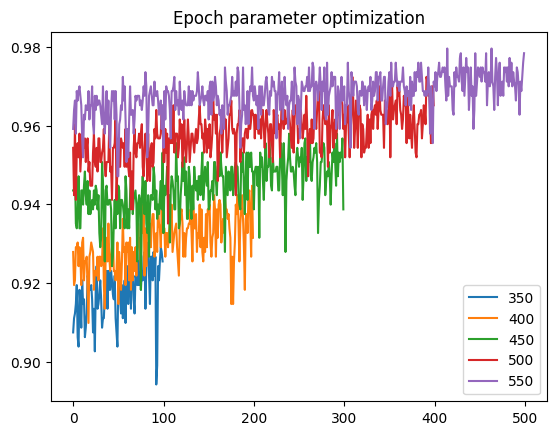

In [43]:

for i, history in enumerate(histories):
    plt.plot(history.history["accuracy"], label=str((50*(i+1))+300))
    plt.title("Epoch parameter optimization")
    plt.legend()

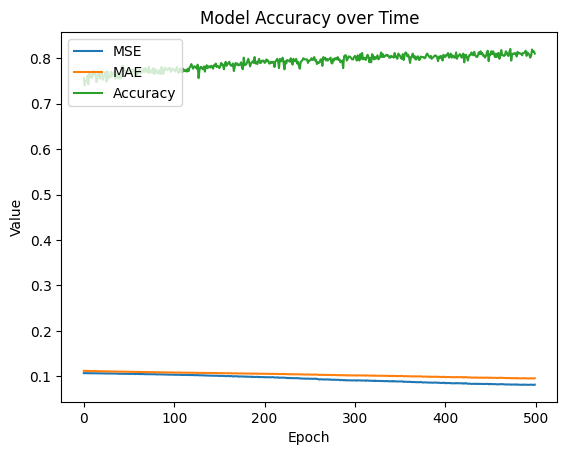

In [21]:
import matplotlib.pyplot as plt

# plot the training and validation accuracy over time
plt.figure()
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy over Time')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(["MSE", "MAE", "Accuracy"], loc="upper left")
plt.show()

2023-04-20 11:17:42.434159: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-20 11:17:42.437527: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-20 11:17:42.440310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 1s 2ms/step


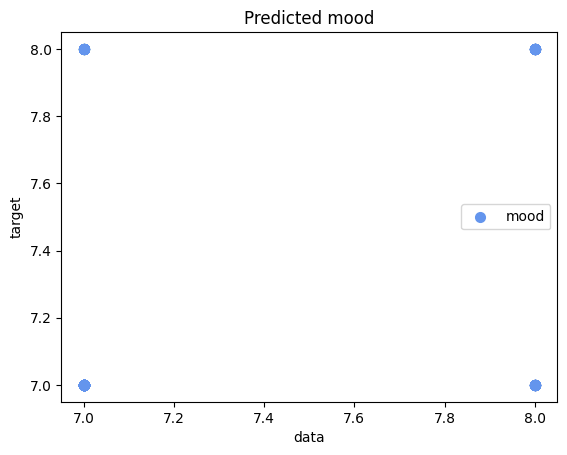

In [22]:
# Plot the predicted value against the value

y_pred = model.predict(X_val)
y_pred_class = np.argmax(y_pred, axis=1)

plt.figure()
plt.scatter(y_val1, y_pred_class, color="cornflowerblue", label="mood", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Predicted mood")
plt.legend()
plt.show()

# Random Forest Classifier

We will now create a random forest classifier that will help us predict the mood for the next day.

In [3]:
import pandas as pd

df = pd.read_csv("pca_dat.csv")
df = df.drop("Unnamed: 0", axis=1)

# first go back from normalization
mood_mean = 6.994508952080043
mood_std = 0.719659211765692

# Recalculate the moods back using the mean and STD
df["mood"] = (df["mood"]*mood_std)+mood_mean
df["mood"] = df["mood"].round()

df = df.reset_index()

X = df.drop('mood', axis=1)
y = df['mood']
y

0       7.0
1       7.0
2       7.0
3       7.0
4       7.0
       ... 
1297    7.0
1298    8.0
1299    7.0
1300    7.0
1301    7.0
Name: mood, Length: 1302, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split

# split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(y_train)

789     7.0
1295    7.0
264     7.0
1187    7.0
384     8.0
       ... 
461     8.0
982     7.0
173     7.0
325     7.0
751     8.0
Name: mood, Length: 832, dtype: float64


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

for estimator in range(25, 225, 25):
    print("Estimator: ", estimator)
    # Create a Random Forest classifier
    rf = RandomForestClassifier(n_estimators=estimator, random_state=42)

    # Train the classifier on the training data
    rf.fit(X_train, y_train)

    # Predict a validation set
    y_pred = rf.predict(X_val)

    accuracy_res = accuracy_score(y_val, y_pred)
    precision_res = precision_score(y_val, y_pred, average="weighted")
    recall_res = recall_score(y_val, y_pred, average="weighted")

    print("accuracy pred: ", accuracy_res)
    print("precision pred: ", precision_res)
    print("recall pred: ", recall_res)


    # Evaluate the classifier on the testing data
    accuracy = rf.score(X_test, y_test)
    print("accuracy:", accuracy)


Estimator:  25
accuracy pred:  0.9425837320574163
precision pred:  0.9424172719053757
recall pred:  0.9425837320574163
accuracy: 0.896551724137931
Estimator:  50
accuracy pred:  0.9282296650717703
precision pred:  0.9294244715153118
recall pred:  0.9282296650717703
accuracy: 0.9003831417624522
Estimator:  75
accuracy pred:  0.9473684210526315
precision pred:  0.9475127911945762
recall pred:  0.9473684210526315
accuracy: 0.9080459770114943
Estimator:  100
accuracy pred:  0.9521531100478469
precision pred:  0.9527636507791813
recall pred:  0.9521531100478469
accuracy: 0.9003831417624522
Estimator:  125
accuracy pred:  0.9569377990430622
precision pred:  0.9568589135456196
recall pred:  0.9569377990430622
accuracy: 0.9080459770114943
Estimator:  150
accuracy pred:  0.9521531100478469
precision pred:  0.9527636507791813
recall pred:  0.9521531100478469
accuracy: 0.9118773946360154
Estimator:  175
accuracy pred:  0.9473684210526315
precision pred:  0.9475127911945762
recall pred:  0.9473684

## Pruning

In [8]:
import numpy as np

forests = []
for ccp_alpha in np.arange(0,0.02, 0.0001):
    print('working on alpha = ',str(ccp_alpha))
    regr = RandomForestClassifier(max_depth=100, ccp_alpha=ccp_alpha)
    regr.fit(X_train, y_train)
    forests.append(regr)

working on alpha =  0.0
working on alpha =  0.0001
working on alpha =  0.0002
working on alpha =  0.00030000000000000003
working on alpha =  0.0004
working on alpha =  0.0005
working on alpha =  0.0006000000000000001
working on alpha =  0.0007
working on alpha =  0.0008
working on alpha =  0.0009000000000000001
working on alpha =  0.001
working on alpha =  0.0011
working on alpha =  0.0012000000000000001
working on alpha =  0.0013000000000000002
working on alpha =  0.0014
working on alpha =  0.0015
working on alpha =  0.0016
working on alpha =  0.0017000000000000001
working on alpha =  0.0018000000000000002
working on alpha =  0.0019
working on alpha =  0.002
working on alpha =  0.0021000000000000003
working on alpha =  0.0022
working on alpha =  0.0023
working on alpha =  0.0024000000000000002
working on alpha =  0.0025
working on alpha =  0.0026000000000000003
working on alpha =  0.0027
working on alpha =  0.0028
working on alpha =  0.0029000000000000002
working on alpha =  0.003
wor

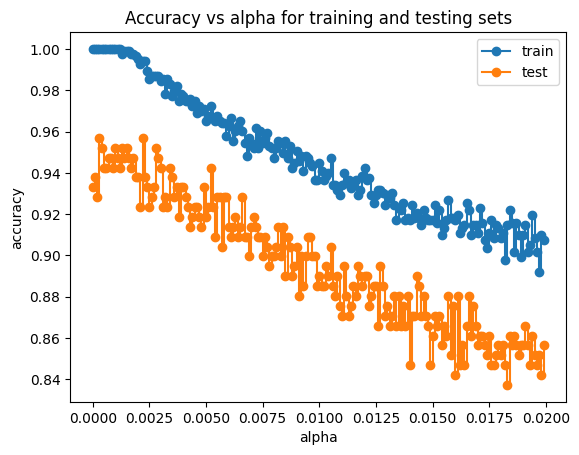

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_scores = []
test_scores = []
for f in forests: 
    regr_pred_tr = f.predict(X_train)
    
    mse_tr = accuracy_score(y_train, regr_pred_tr)
    train_scores.append(mse_tr)
    
    regr_pred_te = f.predict(X_val)
    
    mse_te = accuracy_score(y_val, regr_pred_te)
    test_scores.append(mse_te)

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(np.arange(0,0.02, 0.0001), train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(np.arange(0,0.02, 0.0001), test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()